### Dataframe exploration

In [ ]:
import resources as helpers
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('dsc-phase-2-project-v2-5-main/data/kc_house_data.csv')    #Read the file

In [ ]:
helpers.de.look_dataframe(df)    #Look at dataframe

In [ ]:
helpers.de.look_columns(df, ['heat_source', 'sewer_system'])    # Look at the columns with missing values

**Column Names:** <br>
'id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'address', 'lat', 'long'

**Useful:** <br>
'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio'

**Useless:** <br>
'date', 'id', 'lat', 'long', 'address'

**Potentially Useful:** <br>
'yr_built', 'yr_renovated'

**Actions Needed**
1. Delete duplicates
2. Remove missing values
3. Remove unnecessary rows and columns
4. Remove Outliers
5. Group Small samples categories

In [ ]:
## Setup for columns and subsets
useful_col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront'
              , 'greenbelt', 'nuisance', 'view', 'condition', 'grade', 'heat_source', 'sewer_system'
              , 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio']

useless_col = ['date', 'id', 'lat', 'long', 'address']
categorical = [ 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'greenbelt', 'nuisance'
               , 'view', 'condition', 'grade', 'heat_source', 'sewer_system']
continuous = [column for column in useful_col if column not in categorical]

In [ ]:
## 1., 2., 3., 4 ##
df_cleaned = helpers.dp.check_and_drop(df)    ## Dropped and removed rows that has small amount of missing values
df_cleaned = helpers.dp.outliers_remove(df_cleaned, 'price')    ## Remove outliers of price
df_cleaned.drop(labels = useless_col, axis = 1, inplace = True)

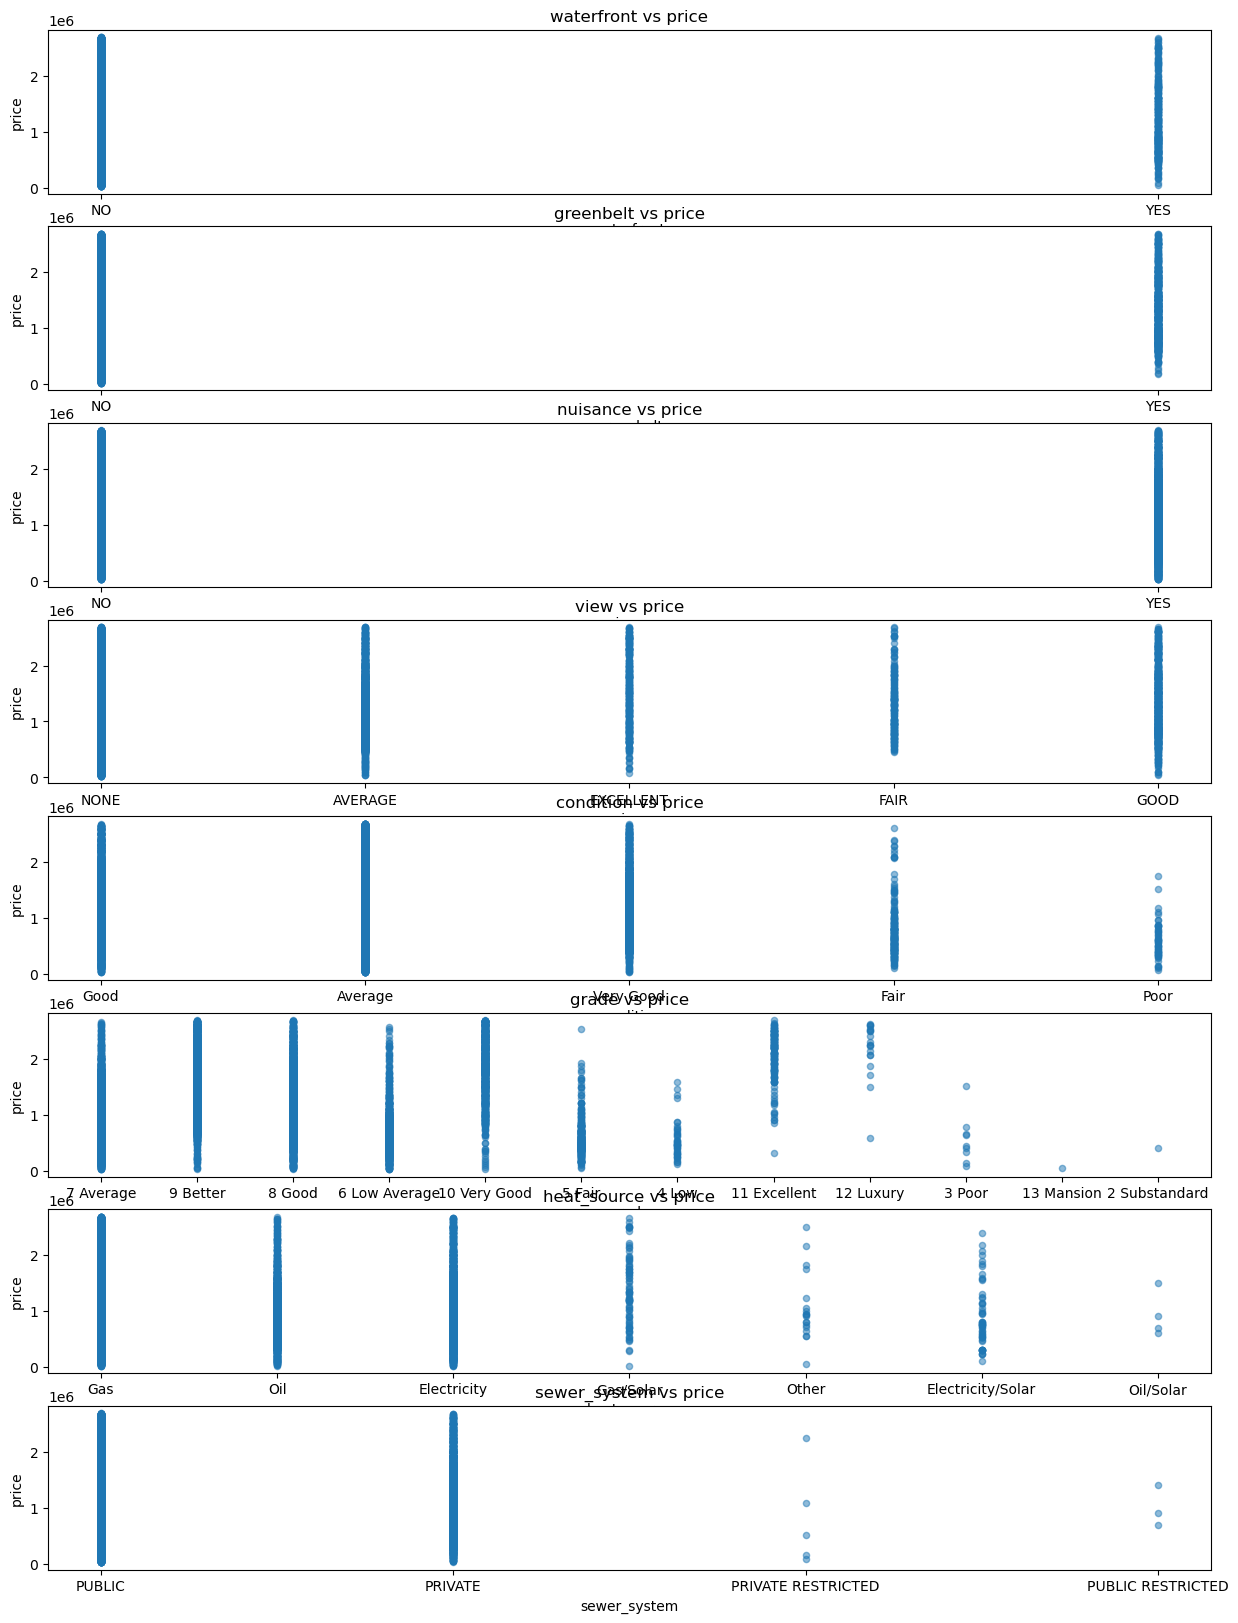

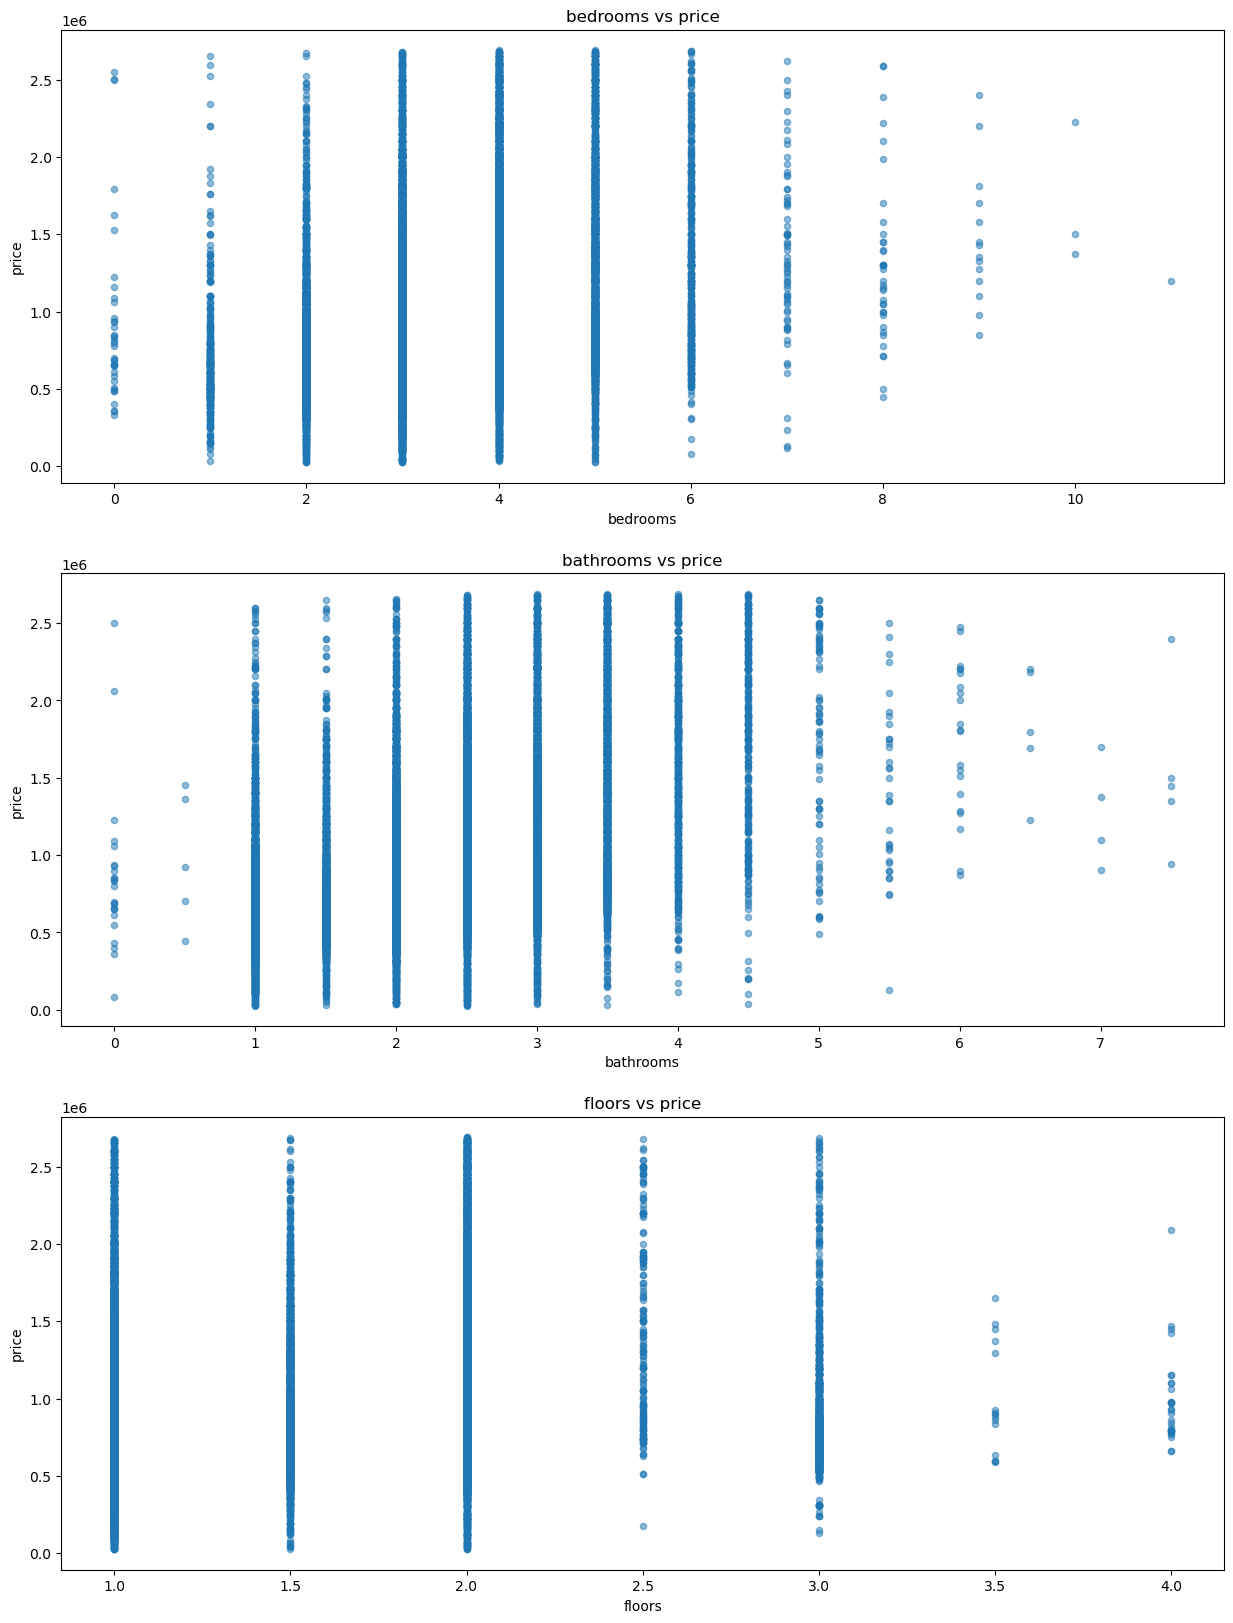

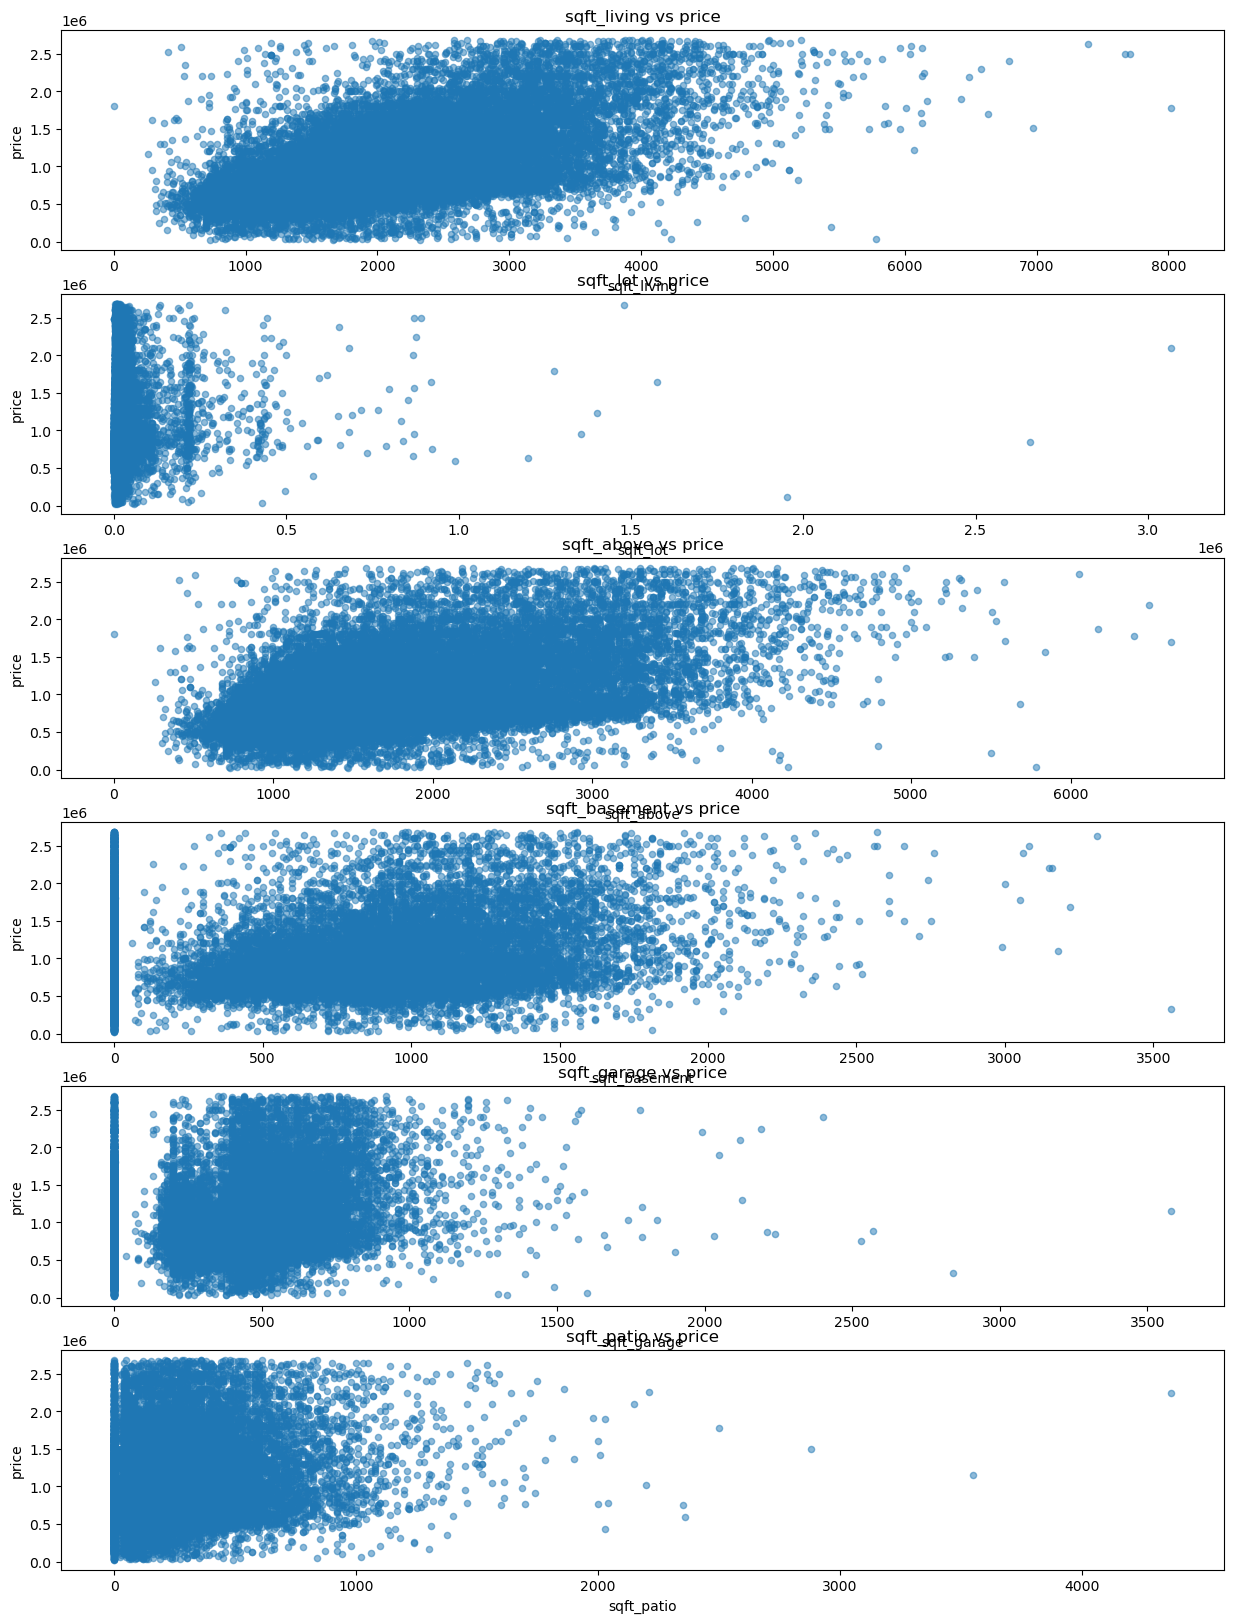

In [58]:
## 5.
df_num, df_obj = helpers.dp.seperate_dataframe(df_cleaned)    ## Seperate the dataframe from objects and integers
num_cat = [column for column in df_num if column in categorical]    ## Number categories
obj_cat = [column for column in df_obj if column in categorical]    ## Object categories

df_num_cat = df_num[num_cat].copy()    ## Dataframe with the number categories
df_num_cat = pd.concat([df_num_cat, df_num['price']], axis = 1)

df_obj_cat = df_obj[obj_cat].copy()    ## Dataframe with the object categories
df_obj_cat = pd.concat([df_obj_cat, df_num['price']], axis = 1)

df_num_only = df_num[continuous].copy()    ## Dataframe with only continuous numbers

for dataframe in [df_obj_cat, df_num_cat, df_num_only]:    ## For all the seperate dataframes
    x_list = [column for column in dataframe.columns if column != 'price']    ## Take the price out due to repetitivity
    helpers.dv.plot_dataframe(dataframe, x_list, 'price', size = (15, 20));    ## Helper function to display all the different columns

In [ ]:
x_list = [column for column in df_obj_cat.columns if column not in 'price']

X_cat = pd.get_dummies(df_obj_cat[x_list], drop_first= True)
y = df_cleaned['price']
model = sm.OLS(y, sm.add_constant(X_cat))
results = model.fit()
for column in df_obj_cat.columns:
    print(df_obj_cat[column].value_counts())

In [ ]:
coeff_pairs = zip(results.pvalues.keys(), results.pvalues.values)
index = 0
for variable in list(coeff_pairs):
    if float(variable[1]) > .05: print(variable)

In [ ]:
## All categories and the number of times they appear
for column in list(df_obj_cat.columns[0:-1]):
    replace = df_obj_cat[column].value_counts()[df_obj_cat[column].value_counts()< 300].index
    df_obj_cat[column].replace(replace, value= 'other',inplace= True)
    print(df_obj_cat[column].value_counts())

In [ ]:
## All categories and the number of times they appear
for column in list(df_num_cat.columns[0:-1]):
    replace = df_num_cat[column].value_counts()[df_num_cat[column].value_counts()< 300].index
    df_num_cat[column].replace(replace, value= 'other',inplace= True)
    print(df_num_cat[column].value_counts())

In [ ]:
for column in list(df_num_only.columns):
    #replace = df_num_cat[column].value_counts()[df_num_cat[column].value_counts()< 300].index
    #df_num_cat[column].replace(replace, value= 'other',inplace= True)
    print(df_num_only[column].value_counts())

In [ ]:
x_list = [column for column in df_obj_cat.columns if column not in 'price']

X_cat = pd.get_dummies(df_obj_cat[x_list], drop_first= True)
y = df_cleaned['price']
model = sm.OLS(y, sm.add_constant(X_cat))
results = model.fit()
for column in df_obj_cat.columns:
    print(df_obj_cat[column].value_counts())

In [ ]:
x_list = [index for index in continuous if index != 'price']
y = df_cleaned['price']
X_num = df_num_only[x_list]

model_num = sm.OLS(y, sm.add_constant(X_num))
result_num = model_num.fit()


In [ ]:
print(result_num.summary())

In [ ]:
num_cat_x_list = pd.concat([X_num, X_cat], axis= 1)
model_combined = sm.OLS(y, sm.add_constant(num_cat_x_list))
result_combined = model_combined.fit()
result_combined

In [ ]:
print(result_combined.summary())

In [ ]:
fig = plt.figure(figsize=(15,30))
#sm.graphics.abline_plot(model_results= result_combined, ax = ax );
final_plot = sm.graphics.plot_partregress_grid(
    result_combined,
    exog_idx=list(num_cat_x_list.columns.values),
    grid=(9,3),
    fig=fig);

### Graphing Object Categories Dataframe
**Result** Both having a waterfront and greenbelt showed to be benificial to the price but nuisance was about the same.

In [ ]:
group_waterfront = df_obj_cat[['waterfront', 'greenbelt', 'nuisance', 'price']].groupby('waterfront').mean().values
x_group1 = [value[0] for value in group_waterfront.tolist()]


In [ ]:
group_greenbelt = df_obj_cat[['waterfront', 'greenbelt', 'nuisance', 'price']].groupby('greenbelt').mean().values
x_group2 = [value[0] for value in group_greenbelt.tolist()]

In [ ]:
group_nuisance = df_obj_cat[['waterfront', 'greenbelt', 'nuisance', 'price']].groupby('nuisance').mean().values
x_group3 = [value[0] for value in group_nuisance.tolist()]

In [ ]:
r = np.arange(2)
width = 2
fig, ax = plt.subplots();
ax.bar(r, x_group1, label = 'Waterfront');
ax.bar(r + width, x_group2, label = 'Greenbelt');
ax.bar(r + width*2, x_group3, label = 'Nuisance');
plt.legend();
plt.ylabel('Mean Price');
ticks = np.arange(6)
plt.xticks(ticks, ['No','Yes','No','Yes','No','Yes']);
ax.set_yticks(np.arange(0,2000000, 500000));
y_ticks = np.arange(0,2000000, 500000)
y_ticks_str = ['${:,}'.format(y) for y in y_ticks]
ax.set_yticklabels(y_ticks_str);
plt.title('Categorical Mean Comparison');

In [ ]:
df_obj_cat['price'].loc[df_obj_cat['waterfront'] == 'YES'].std()

### Adding One At A Time


In [ ]:
df_cleaned['sqft_living']

In [50]:
df_cleaned.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade',
       'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated'],
      dtype='object')

In [ ]:
x = df_cleaned[['bedrooms', 'bathrooms', 'floors']]
y = df_cleaned['price']
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
print(results.summary())

In [60]:
x = df_cleaned[['floors']]
y = df_cleaned['price']
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     1290.
Date:                Sun, 15 Jan 2023   Prob (F-statistic):          2.22e-276
Time:                        13:38:32   Log-Likelihood:            -4.1925e+05
No. Observations:               28896   AIC:                         8.385e+05
Df Residuals:                   28894   BIC:                         8.385e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.068e+05   8198.346     86.208      0.0

const     706764.892573
floors    180306.720241
dtype: float64

In [ ]:
df_cleaned.loc[df_cleaned['sqft_living'] == df_cleaned['sqft_above']]['price'].mean()

In [ ]:
df_cleaned.loc[df_cleaned['sqft_living'] != df_cleaned['sqft_above']]['price'].mean()

In [ ]:
len(df_cleaned.loc[df_cleaned['sqft_living'] != df_cleaned['sqft_above']]), len(df_cleaned.loc[df_cleaned['sqft_living'] == df_cleaned['sqft_above']]['price'])

In [ ]:
df_cleaned.plot.scatter('sqft_above', 'price')

<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

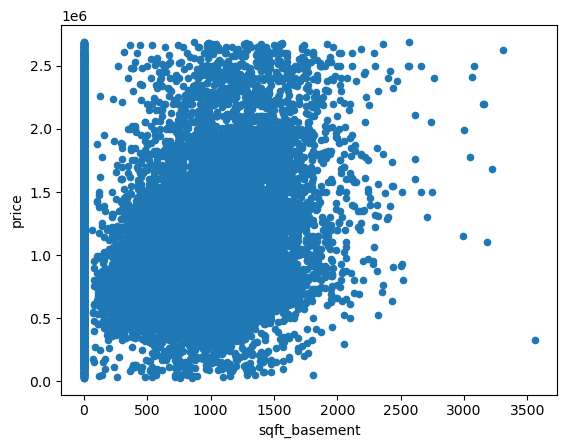

In [57]:
df_cleaned.plot.scatter('sqft_basement', 'price')

In [61]:
results.params

const     706764.892573
floors    180306.720241
dtype: float64